<a href="https://colab.research.google.com/github/ManelSoengas/DL_Task1/blob/main/DL_RoBERTa_1_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="blue"><h1>**DEEP LEARNING**</h1></font>


---
RoBERTa es un modelo de lenguaje basado en transformers que utiliza una arquitectura de red neuronal llamada Transformer para aprender representaciones de palabras y oraciones en un corpus de texto.

Teniendo en cuenta la estructura y volumen de los datos se proponen diversos enfoques :


1.   Aplicar **Dropout** y **early stopping** para evitar la situación de **overfitting**.
2.   Se aplica un preprocesado a los datos de entrada, trai y test.

In [1]:
# Cargar las librerias y recursos necesarios.

import pandas as pd
from sklearn.model_selection import train_test_split
!pip install transformers
from transformers import BertTokenizer, TFBertForSequenceClassification

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.5 MB/s eta 0:00:00


In [2]:
from sklearn.utils import shuffle
# Cargar datos preprocesados
#train_data = pd.read_csv('/content/EXIST2021_training.tsv', delimiter=',', encoding='latin1')
#test_data = pd.read_csv('/content/EXIST2021_test_labeled.tsv', delimiter=',', encoding='latin1')

test_data = pd.read_csv('/content/EXIST2021_test_labeled.tsv', sep='\t')
train_data = pd.read_csv('/content/swapp_EXIST2021_training.tsv', sep='\t') #swapping data_set training
# Mezclar los datos de entrenamiento
shuffled_train_data = shuffle(train_data, random_state=42)

# Mezclar los datos de prueba
shuffled_test_data = shuffle(test_data, random_state=42)

In [3]:
train_data.head(10)

,test_case,id,source,language,text,task1,task2
0,EXIST2021,1,twitter,en,"She calls herself ""anti-feminazi"" how about sh...",sexist,ideological-inequality
1,EXIST2021,2,twitter,en,"Now, back to these women, the brave and the be...",non-sexist,non-sexist
2,EXIST2021,3,twitter,en,"@CurvyBandida @Xalynne_B Wow, your skirt is ve...",sexist,objectification
3,EXIST2021,4,twitter,en,@AurelieGuiboud Incredible! Beautiful!But I l...,non-sexist,non-sexist
4,EXIST2021,5,twitter,en,i find it extremely hard to believe that kelly...,non-sexist,non-sexist
5,EXIST2021,6,twitter,en,@Smithcouple971 Hello....m raj....m with good ...,sexist,sexual-violence
6,EXIST2021,7,twitter,en,@Texas17761 @MomsDemand True story: Me to 18 y...,non-sexist,non-sexist
7,EXIST2021,8,twitter,en,Head coach Caroline Ouellette is excited to sh...,non-sexist,non-sexist
8,EXIST2021,9,twitter,en,"@BankofIndia_IN Devli Branch , New Delhi shoul...",non-sexist,non-sexist
9,EXIST2021,10,twitter,en,Bravo to this woman. No matter what you believ...,non-sexist,non-sexist


In [ ]:
shuffled_train_data.head(10)

,test_case,id,source,language,text,task1,task2
2582,EXIST2021,2583,twitter,en,"@CritFacts @NyaVixa You're repeating yourself,...",sexist,ideological-inequality
8482,EXIST2021,452,twitter,en,I eat sooo much I really hope I don t ’ get fat,non-sexist,non-sexist
8061,EXIST2021,1659,twitter,en,MichaelRapaport @ Isn t ' this the same woman ...,non-sexist,non-sexist
10914,EXIST2021,5440,twitter,es,Paulxg_ @ Ponte a trabajar que tengo que ser m...,sexist,stereotyping-dominance
10162,EXIST2021,3614,twitter,es,"SofiaBVilla @ , rebelde , español soda , stere...",non-sexist,non-sexist
5688,EXIST2021,5689,twitter,es,Cuantas vidas ha salvado esta golfa al frente ...,sexist,misogyny-non-sexual-violence
8513,EXIST2021,1468,twitter,en,"* , because that was the BIGGEST - cock block ...",non-sexist,non-sexist
8645,EXIST2021,2739,twitter,en,The Socialist British Commonwealth of India is...,non-sexist,non-sexist
9265,EXIST2021,2722,twitter,en,In Spank “ ” prank we see how a woman is trick...,sexist,sexual-violence
3274,EXIST2021,3275,twitter,en,tw!! sh•••so much fucking bullshit today in my...,sexist,stereotyping-dominance


<font color="brown"><h1>**Preprocesamiento**</h1></font>



In [4]:
import re

def anonimize_text(text):
    # Anonimizar nombres de usuario
    text = re.sub(r'@[\w_]+', '@user', text)

    # Anonimizar hashtags
    text = re.sub(r'#\w+', '#hashtag', text)

    # Anonimizar enlaces
    text = re.sub(r'https?://\S+', 'link', text)

    return text

shuffled_train_data['text_anonymized'] = shuffled_train_data['text'].apply(anonimize_text)
shuffled_test_data['text_anonymized'] = shuffled_test_data['text'].apply(anonimize_text)

In [5]:
# Convertir a minúsculas

shuffled_train_data.text_anonymized = shuffled_train_data.text_anonymized.str.lower()
shuffled_train_data.head(10)
shuffled_test_data.text_anonymized = shuffled_test_data.text_anonymized.str.lower()
shuffled_test_data.head(10)

,test_case,id,source,language,text,task1,task2,text_anonymized
1374,EXIST2021,8352,twitter,en,"if i ever catch anyone beating a women, i swea...",non-sexist,non-sexist,"if i ever catch anyone beating a women, i swea..."
2293,EXIST2021,9271,twitter,es,"""No sé si habrá un #MeToo del cine español. Cu...",non-sexist,non-sexist,"""no sé si habrá un #hashtag del cine español. ..."
3379,EXIST2021,10357,twitter,es,En el dia de hoy se sostuvo reunión con Claudi...,non-sexist,non-sexist,en el dia de hoy se sostuvo reunión con claudi...
1090,EXIST2021,8068,twitter,en,Man I love a good podcast. I highly recommend ...,non-sexist,non-sexist,man i love a good podcast. i highly recommend ...
1803,EXIST2021,8781,twitter,en,#BidenErasedWomen#BidenAintSmart#RealWomenMatt...,sexist,ideological-inequality,#hashtag#hashtag#hashtag not transgender!.#has...
2694,EXIST2021,9672,twitter,es,"tw/ transfobia ""no es opresión"" -hombres desle...",sexist,ideological-inequality,"tw/ transfobia ""no es opresión"" -hombres desle..."
461,EXIST2021,7439,twitter,en,@not_corona_ maybe its repressed antiblackness .,non-sexist,non-sexist,@user maybe its repressed antiblackness .
3346,EXIST2021,10324,twitter,es,@dara_ordonez ya nada es igual que cuando las ...,sexist,misogyny-non-sexual-violence,@user ya nada es igual que cuando las putas y ...
2297,EXIST2021,9275,twitter,es,"@modadulce Estoy de acuerdo, me parece que ten...",non-sexist,non-sexist,"@user estoy de acuerdo, me parece que tenemos ..."
2873,EXIST2021,9851,twitter,es,#BCSinAdicciones| FAIMUDEl día de hoy realizam...,non-sexist,non-sexist,#hashtag| faimudel día de hoy realizamos una m...


In [6]:
# Eliminar url/website que no usan http, solo utilizan .com websites
# Palabras separadas por a . no son eliminadas

shuffled_train_data.text_anonymized = shuffled_train_data.text_anonymized.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))
shuffled_train_data.head(10)
shuffled_test_data.text_anonymized = shuffled_test_data.text_anonymized.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))
shuffled_test_data.head(10)

,test_case,id,source,language,text,task1,task2,text_anonymized
1374,EXIST2021,8352,twitter,en,"if i ever catch anyone beating a women, i swea...",non-sexist,non-sexist,"if i ever catch anyone beating a women, i swea..."
2293,EXIST2021,9271,twitter,es,"""No sé si habrá un #MeToo del cine español. Cu...",non-sexist,non-sexist,"""no sé si habrá un #hashtag del cine español. ..."
3379,EXIST2021,10357,twitter,es,En el dia de hoy se sostuvo reunión con Claudi...,non-sexist,non-sexist,en el dia de hoy se sostuvo reunión con claudi...
1090,EXIST2021,8068,twitter,en,Man I love a good podcast. I highly recommend ...,non-sexist,non-sexist,man i love a good podcast. i highly recommend ...
1803,EXIST2021,8781,twitter,en,#BidenErasedWomen#BidenAintSmart#RealWomenMatt...,sexist,ideological-inequality,#hashtag#hashtag#hashtag not transgender!.#has...
2694,EXIST2021,9672,twitter,es,"tw/ transfobia ""no es opresión"" -hombres desle...",sexist,ideological-inequality,"tw/ transfobia ""no es opresión"" -hombres desle..."
461,EXIST2021,7439,twitter,en,@not_corona_ maybe its repressed antiblackness .,non-sexist,non-sexist,@user maybe its repressed antiblackness .
3346,EXIST2021,10324,twitter,es,@dara_ordonez ya nada es igual que cuando las ...,sexist,misogyny-non-sexual-violence,@user ya nada es igual que cuando las putas y ...
2297,EXIST2021,9275,twitter,es,"@modadulce Estoy de acuerdo, me parece que ten...",non-sexist,non-sexist,"@user estoy de acuerdo, me parece que tenemos ..."
2873,EXIST2021,9851,twitter,es,#BCSinAdicciones| FAIMUDEl día de hoy realizam...,non-sexist,non-sexist,#hashtag| faimudel día de hoy realizamos una m...


In [7]:
# Expnadir las contracciones en inglés
!pip install contractions
import contractions


# Definir la función de expansión de contracciones
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

# Aplicar la expansión de contracciones a la columna 'text' del DataFrame
shuffled_train_data['text_anonymized'] = shuffled_train_data['text_anonymized'].apply(expand_contractions)
shuffled_train_data.head(10)
shuffled_test_data['text_anonymized'] = shuffled_test_data['text_anonymized'].apply(expand_contractions)
shuffled_test_data.head(10)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.6 MB/s eta 0:00:00


,test_case,id,source,language,text,task1,task2,text_anonymized
1374,EXIST2021,8352,twitter,en,"if i ever catch anyone beating a women, i swea...",non-sexist,non-sexist,"if i ever catch anyone beating a women, i swea..."
2293,EXIST2021,9271,twitter,es,"""No sé si habrá un #MeToo del cine español. Cu...",non-sexist,non-sexist,"""no sé si habrá un #hashtag del cine españold...."
3379,EXIST2021,10357,twitter,es,En el dia de hoy se sostuvo reunión con Claudi...,non-sexist,non-sexist,en el dia de hoy se sostuvo reunión con claudi...
1090,EXIST2021,8068,twitter,en,Man I love a good podcast. I highly recommend ...,non-sexist,non-sexist,man i love a good podcast. i highly recommend ...
1803,EXIST2021,8781,twitter,en,#BidenErasedWomen#BidenAintSmart#RealWomenMatt...,sexist,ideological-inequality,#hashtag#hashtag#hashtag not transgender!.#has...
2694,EXIST2021,9672,twitter,es,"tw/ transfobia ""no es opresión"" -hombres desle...",sexist,ideological-inequality,"tw/ transfobia ""no es opresión"" -hombres desle..."
461,EXIST2021,7439,twitter,en,@not_corona_ maybe its repressed antiblackness .,non-sexist,non-sexist,@user maybe its repressed antiblackness .
3346,EXIST2021,10324,twitter,es,@dara_ordonez ya nada es igual que cuando las ...,sexist,misogyny-non-sexual-violence,@user ya nada es igual que cuando las putas y ...
2297,EXIST2021,9275,twitter,es,"@modadulce Estoy de acuerdo, me parece que ten...",non-sexist,non-sexist,"@user estoy de acuerdo, me parece que tenemos ..."
2873,EXIST2021,9851,twitter,es,#BCSinAdicciones| FAIMUDEl día de hoy realizam...,non-sexist,non-sexist,#hashtag| faimudel día de hoy realizamos una m...


In [7]:
# Eliminar &text; etiquetas html

shuffled_train_data.text_anonymized = shuffled_train_data.text_anonymized.apply(lambda x: re.sub(r'&[a-zñ]+;', '', x))
shuffled_train_data.iloc[4000:4010]
shuffled_test_data.text_anonymized = shuffled_test_data.text_anonymized.apply(lambda x: re.sub(r'&[a-zñ]+;', '', x))
shuffled_test_data.iloc[4000:4010]

,test_case,id,source,language,text,task1,task2,text_anonymized
4232,EXIST2021,11210,twitter,es,@DrManuelGarcia Jajaja de 100// 90 pero por de...,sexist,stereotyping-dominance,@user jajaja de 100// 90 pero por desgracia si...
116,EXIST2021,7094,twitter,en,@s00m3u get your fancam out of the tomasito ha...,sexist,misogyny-non-sexual-violence,@user get your fancam out of the tomasito hash...
3545,EXIST2021,10523,twitter,es,@Luis_Delia Cuánta mierda y escoria kiechneris...,non-sexist,non-sexist,@user cuánta mierda y escoria kiechnerista ......
740,EXIST2021,7718,gab,en,Lying falase victim democrat agent Joy Villa w...,sexist,ideological-inequality,lying falase victim democrat agent joy villa w...
4199,EXIST2021,11177,twitter,es,@HStylesSP @Harry_Styles Empoderamiento con es...,non-sexist,non-sexist,@user @user empoderamiento con esta cancioooon...
1974,EXIST2021,8952,gab,en,.......who do you think put that meme of #mans...,sexist,misogyny-non-sexual-violence,.......who do you think put that meme of #hash...
1081,EXIST2021,8059,twitter,en,Isaias Afewerki &amp; @AbiyAhmedAli both lied ...,non-sexist,non-sexist,isaias afewerki @user both lied about eritrea...
3675,EXIST2021,10653,gab,es,Coletas mandado callar a la feminazi,sexist,ideological-inequality,coletas mandado callar a la feminazi
1810,EXIST2021,8788,twitter,en,@YourQueenBri1 @BearsgetWATSON @teddy420180 @A...,sexist,misogyny-non-sexual-violence,@user @user @user @user since when was it okay...
830,EXIST2021,7808,gab,en,"Yeah, here you come knockin' on my door, baby ...",sexist,objectification,"yeah, here you come knockin' on my door, baby ..."


In [8]:
# Eliminar caráctres especiales, #:)(/\='] usados en emojis y hashtags

shuffled_train_data.text_anonymized = shuffled_train_data.text_anonymized.str.replace("[^a-zA-ZñÑ#]", " ")
shuffled_train_data.head(10)
shuffled_test_data.text_anonymized = shuffled_test_data.text_anonymized.str.replace("[^a-zA-ZñÑ#]", " ")
shuffled_test_data.head(10)

<ipython-input-8-2f10188dda66>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  shuffled_train_data.text_anonymized = shuffled_train_data.text_anonymized.str.replace("[^a-zA-ZñÑ#]", " ")
<ipython-input-8-2f10188dda66>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  shuffled_test_data.text_anonymized = shuffled_test_data.text_anonymized.str.replace("[^a-zA-ZñÑ#]", " ")


,test_case,id,source,language,text,task1,task2,text_anonymized
1374,EXIST2021,8352,twitter,en,"if i ever catch anyone beating a women, i swea...",non-sexist,non-sexist,if i ever catch anyone beating a women i swea...
2293,EXIST2021,9271,twitter,es,"""No sé si habrá un #MeToo del cine español. Cu...",non-sexist,non-sexist,no s si habr un #hashtag del cine español ...
3379,EXIST2021,10357,twitter,es,En el dia de hoy se sostuvo reunión con Claudi...,non-sexist,non-sexist,en el dia de hoy se sostuvo reuni n con claudi...
1090,EXIST2021,8068,twitter,en,Man I love a good podcast. I highly recommend ...,non-sexist,non-sexist,man i love a good podcast i highly recommend ...
1803,EXIST2021,8781,twitter,en,#BidenErasedWomen#BidenAintSmart#RealWomenMatt...,sexist,ideological-inequality,#hashtag#hashtag#hashtag not transgender #has...
2694,EXIST2021,9672,twitter,es,"tw/ transfobia ""no es opresión"" -hombres desle...",sexist,ideological-inequality,tw transfobia no es opresi n hombres desle...
461,EXIST2021,7439,twitter,en,@not_corona_ maybe its repressed antiblackness .,non-sexist,non-sexist,user maybe its repressed antiblackness
3346,EXIST2021,10324,twitter,es,@dara_ordonez ya nada es igual que cuando las ...,sexist,misogyny-non-sexual-violence,user ya nada es igual que cuando las putas y ...
2297,EXIST2021,9275,twitter,es,"@modadulce Estoy de acuerdo, me parece que ten...",non-sexist,non-sexist,user estoy de acuerdo me parece que tenemos ...
2873,EXIST2021,9851,twitter,es,#BCSinAdicciones| FAIMUDEl día de hoy realizam...,non-sexist,non-sexist,#hashtag faimudel d a de hoy realizamos una m...


In [9]:
# Eliminar la columna 'text'
shuffled_train_data.drop('text', axis=1, inplace=True)
shuffled_test_data.drop('text', axis=1, inplace=True)
# Renombrar la columna 'text_anonimized' como 'text'
shuffled_train_data.rename(columns={'text_anonymized': 'text'}, inplace=True)
shuffled_train_data.iloc[4000:4010]
shuffled_test_data.rename(columns={'text_anonymized': 'text'}, inplace=True)
shuffled_test_data.iloc[4000:4010]

,test_case,id,source,language,task1,task2,text
4232,EXIST2021,11210,twitter,es,sexist,stereotyping-dominance,user jajaja de pero por desgracia si...
116,EXIST2021,7094,twitter,en,sexist,misogyny-non-sexual-violence,user get your fancam out of the tomasito hash...
3545,EXIST2021,10523,twitter,es,non-sexist,non-sexist,user cu nta mierda y escoria kiechnerista ...
740,EXIST2021,7718,gab,en,sexist,ideological-inequality,lying falase victim democrat agent joy villa w...
4199,EXIST2021,11177,twitter,es,non-sexist,non-sexist,user user empoderamiento con esta cancioooon...
1974,EXIST2021,8952,gab,en,sexist,misogyny-non-sexual-violence,who do you think put that meme of #hash...
1081,EXIST2021,8059,twitter,en,non-sexist,non-sexist,isaias afewerki user both lied about eritrea...
3675,EXIST2021,10653,gab,es,sexist,ideological-inequality,coletas mandado callar a la feminazi
1810,EXIST2021,8788,twitter,en,sexist,misogyny-non-sexual-violence,user user user user since when was it okay...
830,EXIST2021,7808,gab,en,sexist,objectification,yeah here you come knockin on my door baby ...


<font color="brown"><h1>**Carga de los recursos del algoritmo RoBERTa**</h1></font>

1.   Tokenizador.
2.   Modelo pre-entrenado.

In [12]:
def tokenize_roberta(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer_roberta.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            truncation_strategy='longest_first',
            return_attention_mask=True

        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [13]:
tokenizer_roberta = RobertaTokenizerFast.from_pretrained("roberta-base")

<font color="brown"><h1>**Longitud máxima por sentencia**</h1></font>

Valor relacionado con los recursos de máquina.

In [11]:
MAX_LEN=255

In [ ]:
import numpy as np

shuffled_test_data['text'] = shuffled_test_data['text'].fillna('')  # Rellenar los valores perdidos con una cadena vacía

token_lens = []

for txt in shuffled_test_data['text'].values:
    tokens = tokenizer.encode(txt, max_length=5000, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)
print(max_len)

755


In [ ]:
import numpy as np

shuffled_train_data['text'] = shuffled_train_data['text'].fillna('')  # Rellenar los valores perdidos con una cadena vacía

token_lenss = []

for txt in shuffled_train_data['text'].values:
    tokens = tokenizer.encode(txt, max_length=500, truncation=True)
    token_lenss.append(len(tokens))

max_len=np.max(token_lenss)
print(max_len)

134


In [ ]:
shuffled_train_data.head(10)

,test_case,id,source,language,task1,task2,text
5286,EXIST2021,5287,twitter,es,sexist,stereotyping-dominance,no es que no de ni una es que es otra an...
6018,EXIST2021,6019,twitter,es,non-sexist,non-sexist,si los tiene locos a ellos y a todos porqu...
2981,EXIST2021,2982,twitter,en,non-sexist,non-sexist,i was getting picked up from some place years...
3347,EXIST2021,3348,twitter,en,sexist,sexual-violence,my xmas wish is for you to take my inch c...
469,EXIST2021,470,twitter,en,sexist,stereotyping-dominance,between the conversations conflating domestici...
538,EXIST2021,539,twitter,en,non-sexist,non-sexist,will you stop being a dick for one day ...
3176,EXIST2021,3177,twitter,en,non-sexist,non-sexist,at any given moment perfect equality is ...
6127,EXIST2021,6128,twitter,es,sexist,misogyny-non-sexual-violence,esa parte es la mejor poner en su lugar a la ...
1047,EXIST2021,1048,twitter,en,sexist,sexual-violence,imagine a woman being physically overpowered...
1330,EXIST2021,1331,twitter,en,sexist,ideological-inequality,women who have one foot in christianity and o...


In [14]:
X = shuffled_train_data['text'].values
y = shuffled_train_data['task1'].values
Z = shuffled_test_data['text'].values
z = shuffled_test_data['task1'].values

In [15]:
# Dividir los datos en entrenamiento y prueba
train_text, val_text, train_task1, val_task1 = train_test_split(X, y, test_size=0.2, random_state=42)


<font color="brown"><h1>**Codificación**</h1></font>
Codificación en representaciones one-hot de la clase utilizando OneHotEncoder y se obtiene las matrices densas.

In [16]:
#keras
import tensorflow as tf
from tensorflow import keras


#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
import numpy as np
from sklearn import preprocessing
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(train_task1).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(val_task1).reshape(-1, 1)).toarray()
z_test = ohe.fit_transform(np.array(z).reshape(-1, 1)).toarray()

<font color="brown"><h1>**Obtención de los datos**</h1></font>
Para una estructura BERT es necesario obtener :


1.   Tokenizado del conjunto de datos : train, test y val.
2.   Obtención de la máscara de atención para cada conjunto de datos.



In [18]:
train_input_ids, train_attention_masks = tokenize_roberta(train_text, MAX_LEN)
val_input_ids, val_attention_masks = tokenize_roberta(val_text, MAX_LEN)
test_input_ids, test_attention_masks = tokenize_roberta(Z, MAX_LEN)

<font color="brown"><h1>**Estructura de los datos**</h1></font>

In [19]:
print(train_input_ids.shape)
print(val_input_ids.shape)
print(test_input_ids.shape)

(9581, 255)
(2396, 255)
(4368, 255)


<font color="brown"><h1>**Configuración del modelo**</h1></font>

In [20]:
def create_model(bert_model, max_len=MAX_LEN):
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.BinaryCrossentropy()
    accuracy = tf.keras.metrics.BinaryAccuracy()

    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')
    output = bert_model([input_ids, attention_masks])
    output = output[1]

    # Agregar Dropout
    output = tf.keras.layers.Dropout(0.5)(output)

    output = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(output)
    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)

    # Compilar el modelo
    model.compile(opt, loss=loss, metrics=accuracy)

    # Agregar Early Stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')

    return model, early_stopping

In [21]:
roberta_model = TFRobertaModel.from_pretrained('roberta-base')


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'roberta.embeddings.position_ids', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

<font color="brown"><h1>**Creación del modelo**</h1></font>

In [22]:
#model = create_model(roberta_model, MAX_LEN)
model, early_stopping = create_model(roberta_model, MAX_LEN)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 255)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 255)]        0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['input_1[0][0]',                
 el)                            thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 255,                                           

In [23]:
history_2 = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=6, batch_size=32)


Epoch 1/6
300/300 [==============================] - 578s 2s/step - loss: 0.6353 - binary_accuracy: 0.6204 - val_loss: 0.5949 - val_binary_accuracy: 0.6987
Epoch 2/6
300/300 [==============================] - 517s 2s/step - loss: 0.4659 - binary_accuracy: 0.7818 - val_loss: 0.4654 - val_binary_accuracy: 0.7830
Epoch 3/6
300/300 [==============================] - 517s 2s/step - loss: 0.3689 - binary_accuracy: 0.8417 - val_loss: 0.4035 - val_binary_accuracy: 0.8172
Epoch 4/6
300/300 [==============================] - 516s 2s/step - loss: 0.2767 - binary_accuracy: 0.8902 - val_loss: 0.4420 - val_binary_accuracy: 0.8247
Epoch 5/6
300/300 [==============================] - 516s 2s/step - loss: 0.1960 - binary_accuracy: 0.9262 - val_loss: 0.3856 - val_binary_accuracy: 0.8627
Epoch 6/6
300/300 [==============================] - 515s 2s/step - loss: 0.1516 - binary_accuracy: 0.9421 - val_loss: 0.4593 - val_binary_accuracy: 0.8656


In [24]:
result_roberta = model.predict([test_input_ids,test_attention_masks])

137/137 [==============================] - 78s 538ms/step


In [25]:
y_pred_roberta =  np.zeros_like(result_roberta)
y_pred_roberta[np.arange(len(y_pred_roberta)), result_roberta.argmax(1)] = 1

In [26]:
print('\tClassification Report for BERT:\n\n',classification_report(z_test,y_pred_roberta, target_names=['sexist', 'non-sexist']))


	Classification Report for BERT:

               precision    recall  f1-score   support

      sexist       0.76      0.68      0.72      2087
  non-sexist       0.73      0.81      0.77      2281

   micro avg       0.75      0.75      0.75      4368
   macro avg       0.75      0.74      0.74      4368
weighted avg       0.75      0.75      0.74      4368
 samples avg       0.75      0.75      0.75      4368



<font color="brown"><h1>**Evaluación del modelo**</h1></font>

Se obtienen las siguientes gráficas y tablas para obtener una idea de la calidad y evolución del modelo.

1.   Matriz de confusión.
2.   Curvas de evolucción del modelo durante el entrenamiento.



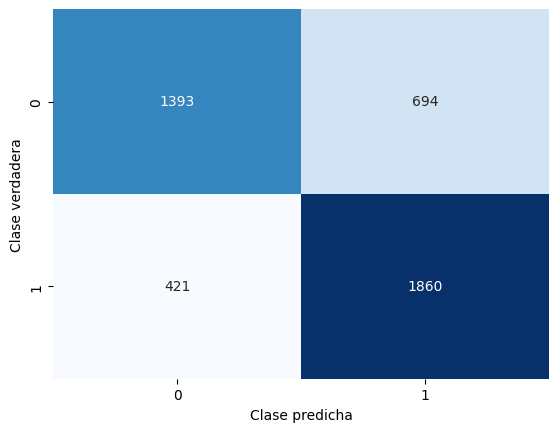

In [29]:
#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que z_test.argmax(1) son las etiquetas reales y y_pred_roberta.argmax(1) son las etiquetas predichas
cm = confusion_matrix(z_test.argmax(1), y_pred_roberta.argmax(1))

# Crear un heatmap de la matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Añadir etiquetas a los ejes
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")

# Mostrar el gráfico
plt.show()


Resultados de BERT:
[[0.01111692 0.9888831 ]
 [0.9974775  0.00252257]
 [0.9984499  0.00155008]
 ...
 [0.03985207 0.9601479 ]
 [0.00430626 0.9956937 ]
 [0.12817654 0.8718235 ]]
Predicciones de BERT:
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


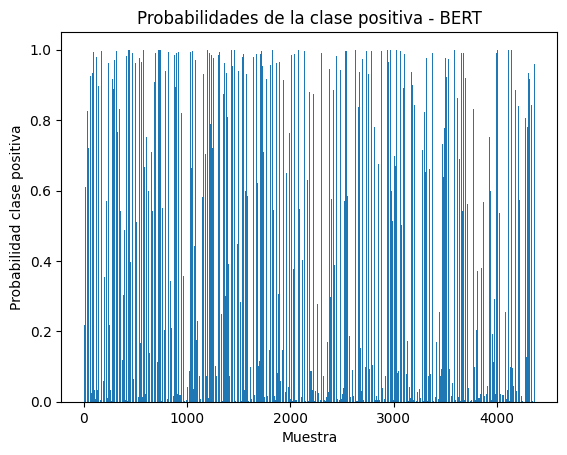

In [ ]:
result_roberta = model.predict([test_input_ids, test_attention_masks])
y_pred_roberta = np.zeros_like(result_roberta)
y_pred_roberta[np.arange(len(y_pred_roberta)), result_roberta.argmax(1)] = 1

# Imprimir result_roberta
print("Resultados de RoBERTa:")
print(result_roberta)

# Imprimir y_pred_roberta
print("Predicciones de RoBERTa:")
print(y_pred_roberta)

# Obtener las probabilidades de la clase positiva (etiqueta 1)
probabilities = result_roberta[:, 1]

# Crear índices para las muestras
indices = np.arange(len(probabilities))

# Generar gráfico de barras
plt.bar(indices, probabilities)
plt.xlabel("Muestra")
plt.ylabel("Probabilidad clase positiva")
plt.title("Probabilidades de la clase positiva - RoBERTa")
plt.show()

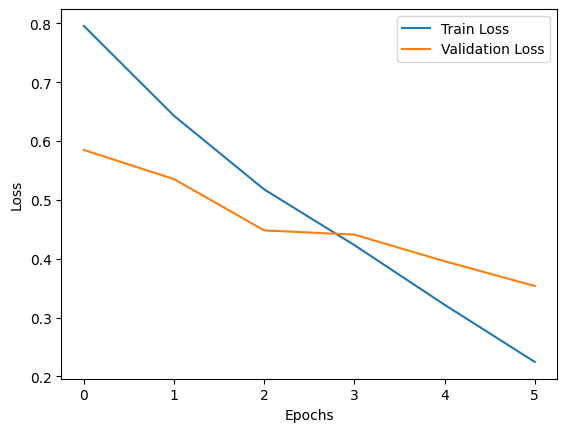

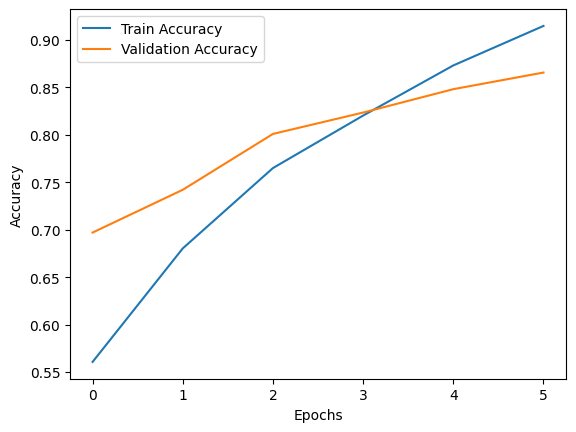

In [ ]:
import matplotlib.pyplot as plt

# Obtener las métricas de entrenamiento y validación del historial
train_loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
train_accuracy = history_2.history['binary_accuracy']
val_accuracy = history_2.history['val_binary_accuracy']

# Generar gráfica de pérdida
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generar gráfica de precisión
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<font color="brown"><h1>**Conclusiones**</h1></font>



<font color="brown"><h1>**Bibliografia**</h1></font>